<a href="https://colab.research.google.com/github/sunilkumar1762/DATAVINCI_ASSIGNMENT/blob/main/DataVinci_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [17]:

# read CSV file
df = pd.read_csv("/content/Ecommerce_Transactions_Data.csv")
df.head()


,TransactionNo,Date,ProductNo,Product,Price,Quantity,CustomerNo,Country,Category
0,704274,2024-03-06,10010,LED String Lights,10.00,11,13673.0,Netherlands,Lighting & Ambience
1,439989,2024-12-27,10001,Vintage Clock,15.99,8,56712.0,Sweden,Decor Essentials
2,607445,2024-11-16,10008,Notebook Pack,7.50,23,45809.0,Canada,Office & Study
3,784100,2023-06-11,10001,Vintage Clock,15.99,29,98102.0,Switzerland,Decor Essentials
4,973030,2024-04-21,10003,Wooden Picture Frame,9.99,4,26596.0,Belgium,Decor Essentials


Performing Data Cleaning

In [18]:

df.columns = [c.strip() for c in df.columns]
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['Quantity'] = pd.to_numeric(df['Quantity'], errors='coerce')
df['TotalAmount'] = df['Price'] * df['Quantity']
df['IsCancellation'] = df['TransactionNo'].astype(str).str.contains('C') | (df['Quantity'] < 0)
df_clean = df[~df['IsCancellation']].copy()
df_clean = df_clean[df_clean['TotalAmount'] > 0]

print("Total transactions:", len(df_clean))
print("Unique customers:", df_clean['CustomerNo'].nunique())
print("Total revenue: £", df_clean['TotalAmount'].sum())


Total transactions: 485005
Unique customers: 89558
Total revenue: £ 111182278.29999998


Data Exploration

In [19]:
# Checking missing values
print(df_clean.isna().sum())

# descriptive stats
df_clean.describe(include="all").T.head(15)


TransactionNo          0
Date              294063
ProductNo              0
Product                0
Price                  0
Quantity               0
CustomerNo          4817
Country                0
Category               0
TotalAmount            0
IsCancellation         0
dtype: int64


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionNo,485005,375392,972568,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,190942,NaN,NaN,NaN,2023-12-21 19:05:55.923787776,2023-01-01 00:00:00,2023-07-01 00:00:00,2023-12-12 00:00:00,2024-06-12 00:00:00,2024-12-12 00:00:00,NaN
ProductNo,485005.0,NaN,NaN,NaN,10005.49738,10001.0,10003.0,10006.0,10008.0,10010.0,2.872083
Product,485005,10,Notebook Pack,48865,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,485005.0,NaN,NaN,NaN,14.780155,5.0,9.99,14.0,19.99,30.0,7.212741
Quantity,485005.0,NaN,NaN,NaN,15.510694,1.0,8.0,16.0,23.0,30.0,8.65731
CustomerNo,480188.0,NaN,NaN,NaN,55002.238011,10000.0,32448.0,54995.0,77547.0,99999.0,25997.132971
Country,485005,12,Sweden,40842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,485005,5,Office & Study,97444,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalAmount,485005.0,NaN,NaN,NaN,229.239448,5.0,90.0,182.0,319.8,900.0,181.09317


**a.  What is the distribution of transaction amounts?**

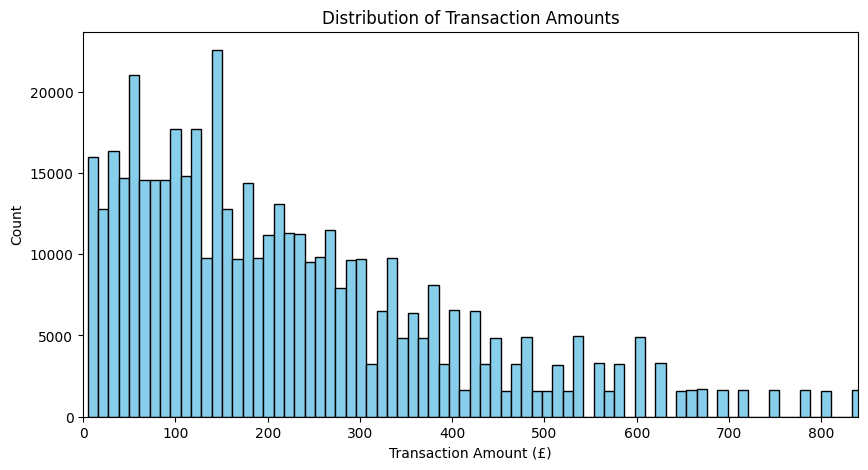

In [20]:
plt.figure(figsize=(10,5))
plt.hist(df_clean['TotalAmount'], bins=80, color="skyblue", edgecolor="black")
plt.xlim(0, df_clean['TotalAmount'].quantile(0.99))  # cap to remove extreme outliers
plt.title("Distribution of Transaction Amounts")
plt.xlabel("Transaction Amount (£)")
plt.ylabel("Count")
plt.show()




The above plot shows that most transactions are of low value, while a small number of transactions are much larger. The distribution is right-skewed — meaning there are far more small purchases than large ones.




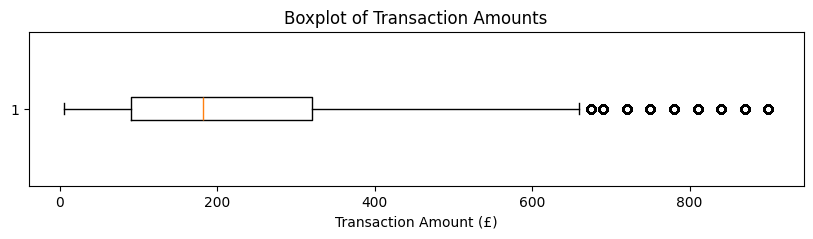

In [13]:
# Boxplot
plt.figure(figsize=(10,2))
plt.boxplot(df_clean['TotalAmount'], vert=False)
plt.title("Boxplot of Transaction Amounts")
plt.xlabel("Transaction Amount (£)")
plt.show()


The boxplot confirms the skewness and highlights many outliers (very high-value purchases). This suggests that while the majority of orders are small, large wholesale-type orders also exist.

**b. How does the total transaction amount vary over time?**

/tmp/ipython-input-3678382453.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df_clean.set_index('Date')['TotalAmount'].resample('M').sum()


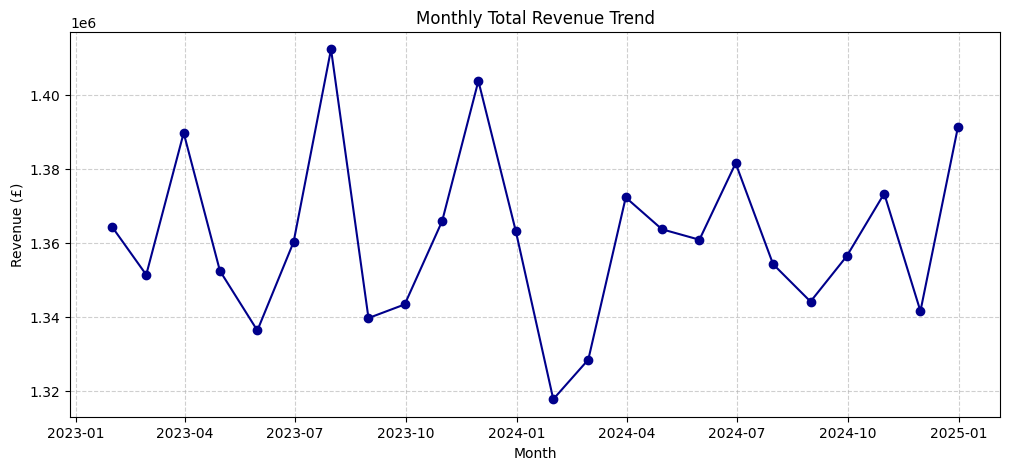

In [6]:
monthly = df_clean.set_index('Date')['TotalAmount'].resample('M').sum()

plt.figure(figsize=(12,5))
plt.plot(monthly.index, monthly.values, marker='o', color="darkblue")
plt.title("Monthly Total Revenue Trend")
plt.xlabel("Month")
plt.ylabel("Revenue (£)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


The revenue changes over time instead of staying the same every month.

We can see seasonal peaks, where sales are much higher in certain months (such as around holidays).

Some months show lower activity, meaning customer demand slows down.

This suggests that the business is affected by seasonal buying patterns and should prepare for busy months in advance.

**C. Which product categories generate the most revenue?**

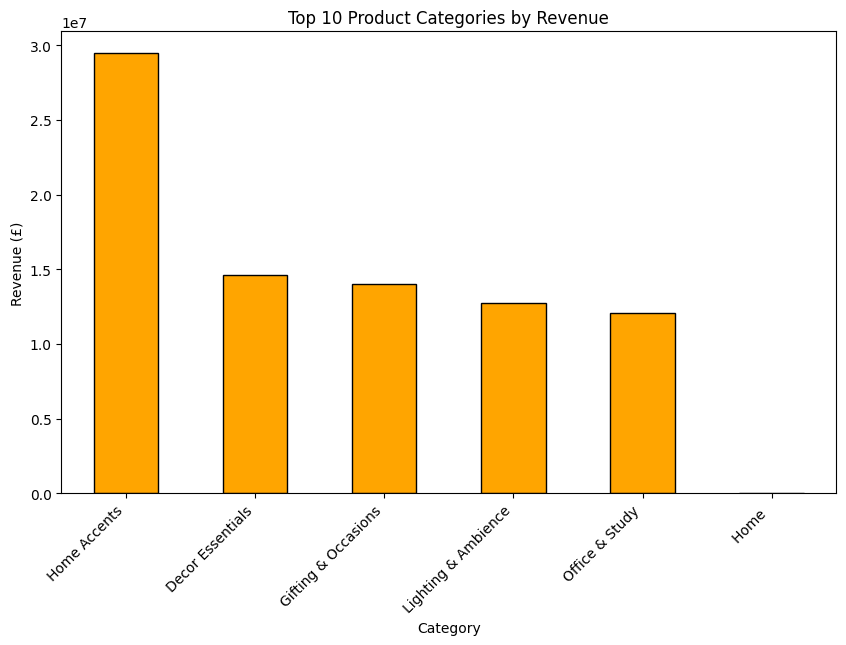

In [7]:
cat_rev = df_clean.groupby('Category')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
cat_rev.plot(kind='bar', color="orange", edgecolor="black")
plt.title("Top 10 Product Categories by Revenue")
plt.ylabel("Revenue (£)")
plt.xlabel("Category")
plt.xticks(rotation=45, ha="right")
plt.show()


The bar chart shows that a few product categories generate the majority of revenue.

These categories are the company’s key revenue drivers and should be prioritized for stock management, marketing, and promotions.

Other categories contribute much less, which could suggest niche demand or potential areas for growth.

**d. Can you identify any trends or patterns in customer purchasing behaviour?**

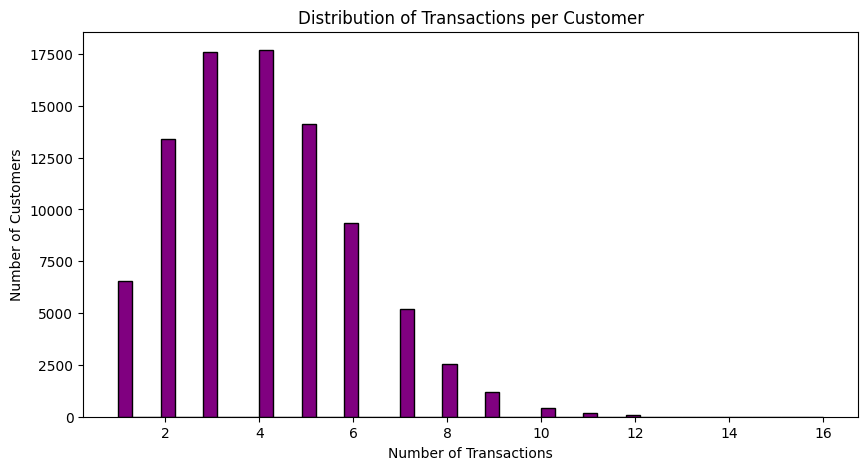

In [14]:
# Transactions per customer
cust_counts = df_clean.groupby('CustomerNo').size()

plt.figure(figsize=(10,5))
plt.hist(cust_counts, bins=50, color="purple", edgecolor="black")
plt.title("Distribution of Transactions per Customer")
plt.xlabel("Number of Transactions")
plt.ylabel("Number of Customers")
plt.show()




Transactions per Customer:
The histogram shows that most customers make only 1–2 purchases, while a smaller group of loyal customers makes frequent purchases.

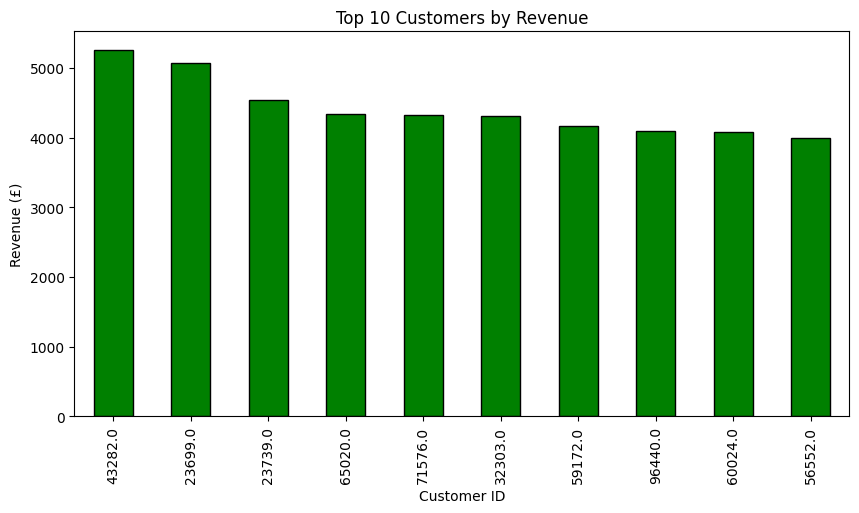

In [15]:
# Top 10 customers by revenue
cust_rev = df_clean.groupby('CustomerNo')['TotalAmount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
cust_rev.plot(kind="bar", color="green", edgecolor="black")
plt.title("Top 10 Customers by Revenue")
plt.ylabel("Revenue (£)")
plt.xlabel("Customer ID")
plt.show()

The bar chart highlights that a handful of customers contribute disproportionately to total revenue. These high-value customers are crucial for business and should be targeted with retention and loyalty programs.